# Analysis of the Diabetes Dataset

Scikit-learn contain several datasets that you can download and play with, with documentation and examples of using them in different conditions.
Here we will quickly load them and perform very rudimentary analysis, which you can extend, if there is time, during the meetup.

In [1]:
# Imports
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()

# Turn into a pandas Data Frame for easier exploration
data = pd.DataFrame(np.c_[diabetes['data'], diabetes['target']], 
                    columns=diabetes['feature_names'] + ['target'])

## Data Exploration

In [2]:
display(data.head())
print(data.shape)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


(442, 11)


In [10]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


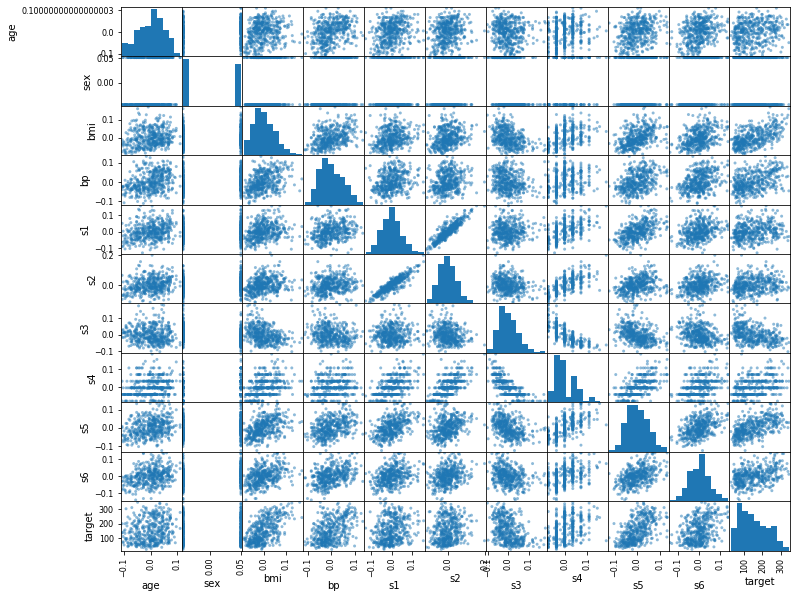

In [3]:
pd.plotting.scatter_matrix(data, figsize=(12, 10))
plt.show()

## Prepare the data for ML

In [4]:
# The data is mostly prepared, we will just split it into a test set and a 
# trainig set for later evaluation of generalization error.
# The data is also already normalized, but normally a lot of work will go
# in this phase.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
display(X_train.shape, X_test.shape)

(353, 10)

(89, 10)

## Try some linear models

In [5]:
# First we create a baseline linear regression model.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.47333863116591357

In [6]:
# Following the model zoo, we try out Lasso and ElasticNet as well
from sklearn.linear_model import Lasso, ElasticNet

lasso = Lasso()
lasso.fit(X_train, y_train)
display(lasso.score(X_test, y_test))

eln = ElasticNet()
eln.fit(X_train, y_train)
display(eln.score(X_test, y_test))

0.35387484538934855

0.006968799249993718

In [7]:
# Add Cross Validation parameter tuning
from sklearn.linear_model import LassoCV, ElasticNetCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
display(lasso_cv.score(X_test, y_test))

eln_cv = ElasticNetCV(cv=5)
eln_cv.fit(X_train, y_train)
display(eln_cv.score(X_test, y_test))

0.47574325907253634

0.4177713312884671

## Try more sophisticated ensemble methods


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


gb = GradientBoostingRegressor(random_state=1, n_estimators=10)
rf = RandomForestRegressor(random_state=1, n_estimators=10)
lr = LinearRegression()
voting = VotingRegressor([('gb', gb), ('rf', rf), ('lr', lr)])

gb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
voting.fit(X_train, y_train)

print(f"gb score: {gb.score(X_test, y_test)}")
print(f"rf score: {rf.score(X_test, y_test)}")
print(f"lr score: {lr.score(X_test, y_test)}")
print(f"voting score: {voting.score(X_test, y_test)}")

gb score: 0.34897822323173
rf score: 0.2683416726892621
lr score: 0.47333863116591357
voting score: 0.41608909836650565


## Check the prediction vs. real value curves

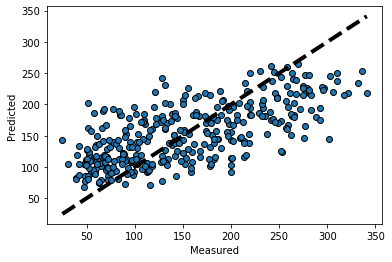

In [9]:
from sklearn.model_selection import cross_val_predict


gb = GradientBoostingRegressor(random_state=1, n_estimators=10)
rf = RandomForestRegressor(random_state=1, n_estimators=10)
lr = LinearRegression()
voting = VotingRegressor([('gb', gb), ('rf', rf), ('lr', lr)])

X, y = X_train, y_train

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(voting, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# Can you make it better?